#### Pre-processing e class balancing

In [9]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. Lettura dei dati
X_train = pd.read_csv("Dataset/Train/X_train.csv")
y_train = pd.read_csv("Dataset/Train/y_train.csv")

# Conta le occorrenze delle classi faulty (0 e 1)
faulty_counts = y_train['faulty'].value_counts()
print(faulty_counts)

# 2. Unire X_train e y_train per mantenere le etichette
df_train = pd.merge(X_train, y_train, on="id")

# Separare le feature e le etichette
X = df_train.drop(columns=["id", "faulty", "trq_margin"])
y = df_train[["faulty", "trq_margin"]]

target_size = 299418

undersampler = RandomUnderSampler(sampling_strategy=1.0, random_state=42)  # Undersampling della classe maggioritaria

# Applicare l'undersampling
X_undersampled, y_undersampled = undersampler.fit_resample(X, y["faulty"])
print(X_undersampled.value_counts())
print(y_undersampled.value_counts())

# 4. Standardizzare i dati
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_undersampled)

# 5. Creare i nuovi DataFrame per X_train e y_train
df_X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Convertire y_resampled in un formato 1D (array semplice)
y_undersampled = y_undersampled.values.flatten()

# Creare un DataFrame per y_train, che include anche trq_margin
y_train_final = pd.DataFrame({
    'id': df_train['id'][:len(df_X_scaled)],
    'faulty': y_undersampled,
    'trq_margin': df_train['trq_margin'][:len(df_X_scaled)]
})

# 6. Salvare i nuovi DataFrame nei file CSV
df_X_scaled.to_csv("Dataset/Train/X_train_resampled.csv", index=False)
y_train_final.to_csv("Dataset/Train/y_train_resampled.csv", index=False)

print("I file sono stati salvati correttamente come X_train_resampled.csv e y_train_resampled.csv.")

faulty
0    443207
1    299418
Name: count, dtype: int64
trq_measured  oat       mgt       pa          ias        np         ng       
73.00000      22.25000  619.4000   249.32640  0.00000    99.87000   95.14000     15
67.70000      18.00000  592.3000   576.07200  106.43750  99.95000   93.65000     13
57.10000      22.00000  567.3000   312.11520  94.75000   100.29000  91.17000     13
79.70000      19.75000  636.7000   503.52960  117.62500  100.29000  96.49000     13
77.10000      19.75000  626.8000   490.72800  117.25000  100.16000  95.73000     11
                                                                                 ..
97.80000      23.50000  701.7000  -46.63440   18.18750   99.47000   100.23000     1
98.13477      13.34870  688.1719   21.56133   20.30518   99.74415   97.54480      1
98.60000      16.75000  712.1000   401.72640  69.00000   99.14000   100.13000     1
99.00000      8.75000   646.0000  -103.02240  0.00000    96.72000   100.14000     1
104.73050     13.43342  6

In [10]:
df_X_scaled.describe()

,trq_measured,oat,mgt,pa,ias,np,ng
count,5.988360e+05,5.988360e+05,5.988360e+05,5.988360e+05,5.988360e+05,5.988360e+05,5.988360e+05
mean,-6.052065e-16,-1.670648e-17,5.748833e-15,-4.783179e-16,4.227879e-16,-5.723061e-15,7.989993e-15
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-3.661881e+00,-3.761601e+00,-3.183721e+00,-1.312868e+00,-2.199876e+00,-3.177400e+00,-1.504751e+00
25%,-6.692679e-01,-6.298903e-01,-7.651790e-01,-6.725455e-01,-8.179432e-01,-5.054742e-01,-9.089284e-01
50%,3.269728e-02,1.636102e-01,-7.025353e-02,-3.331232e-01,2.274440e-01,5.805350e-01,-1.828435e-01
75%,7.639110e-01,7.329156e-01,7.710881e-01,3.301562e-01,8.946037e-01,6.458227e-01,1.225154e+00
max,2.923222e+00,2.953874e+00,3.267404e+00,4.410423e+00,1.650293e+00,1.038079e+00,1.592338e+00


In [11]:
y_train_final.describe()

,id,faulty,trq_margin
count,598836.000000,598836.0,598836.000000
mean,299417.500000,0.5,-1.152178
std,172869.207238,0.5,14.064804
min,0.000000,0.0,-74.747111
25%,149708.750000,0.0,-6.598761
50%,299417.500000,0.5,1.695309
75%,449126.250000,1.0,7.789934
max,598835.000000,1.0,33.597754


##### Calcolo del trq_target e aggiunta nell'X_train_resampled

In [12]:
#Lettura dei dataset
X_t_res = pd.read_csv("Dataset\Train\X_train_resampled.csv")
y_t_res = pd.read_csv("Dataset\Train\y_train_resampled.csv")

#Definisco le variabili di interesse
trq_measured = X_t_res['trq_measured']
trq_margin = y_t_res['trq_margin']
trq_target = 0

#Calcolo del trq_target
X_t_res['trq_target'] = trq_measured / (1 + (trq_margin / 100))

# Salvataggio del nuovo dataset con la colonna aggiunta
X_t_res.to_csv("Dataset/Train/X_train_resampled_with_target.csv", index=False)

<>:2: SyntaxWarning: invalid escape sequence '\T'
<>:3: SyntaxWarning: invalid escape sequence '\T'
<>:2: SyntaxWarning: invalid escape sequence '\T'
<>:3: SyntaxWarning: invalid escape sequence '\T'
C:\Users\gians_ji5genm\AppData\Local\Temp\ipykernel_9612\302961149.py:2: SyntaxWarning: invalid escape sequence '\T'
  X_t_res = pd.read_csv("Dataset\Train\X_train_resampled.csv")
C:\Users\gians_ji5genm\AppData\Local\Temp\ipykernel_9612\302961149.py:3: SyntaxWarning: invalid escape sequence '\T'
  y_t_res = pd.read_csv("Dataset\Train\y_train_resampled.csv")


##### Analisi con la nuova variabile trq_target

<>:7: SyntaxWarning: invalid escape sequence '\T'
<>:7: SyntaxWarning: invalid escape sequence '\T'
C:\Users\gians_ji5genm\AppData\Local\Temp\ipykernel_10368\1780893683.py:7: SyntaxWarning: invalid escape sequence '\T'
  y_train_res = pd.read_csv('Dataset\Train\y_train_resampled.csv')


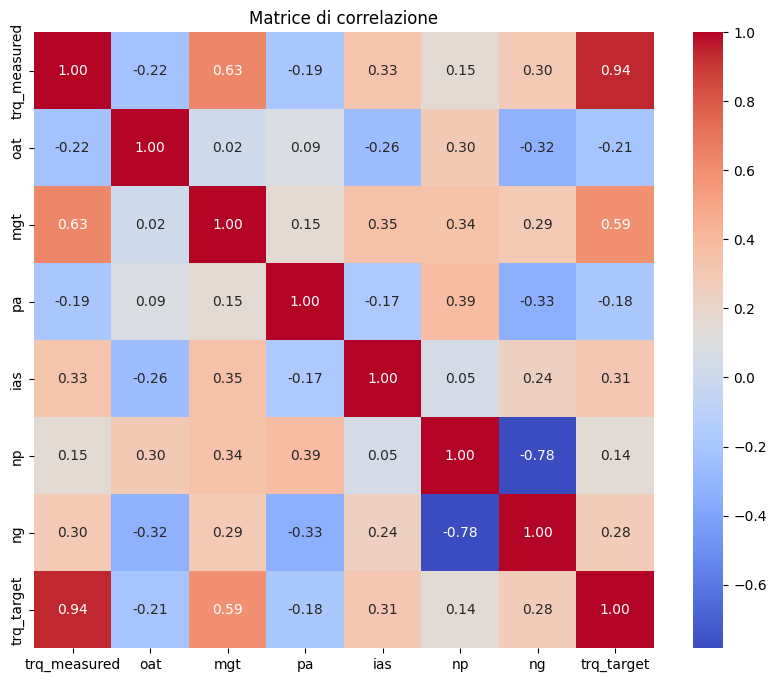

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Lettura del dataset
X_train_target = pd.read_csv('Dataset/Train/X_train_resampled_with_target.csv')
y_train_res = pd.read_csv('Dataset\Train\y_train_resampled.csv')

# Calcolo della matrice di correlazione
correlation_matrix = X_train_target.corr()

# Visualizzazione della matrice di correlazione come heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matrice di correlazione")
plt.show()

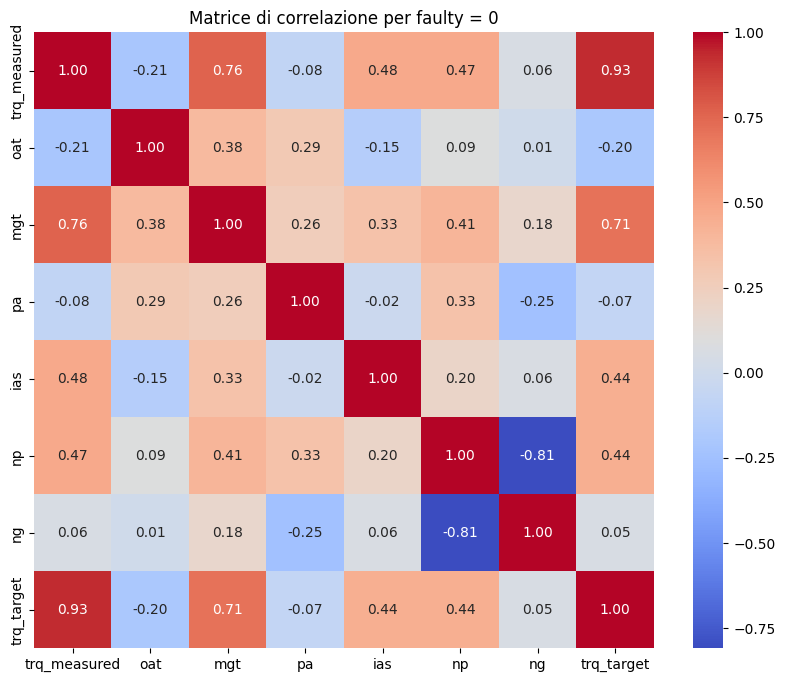

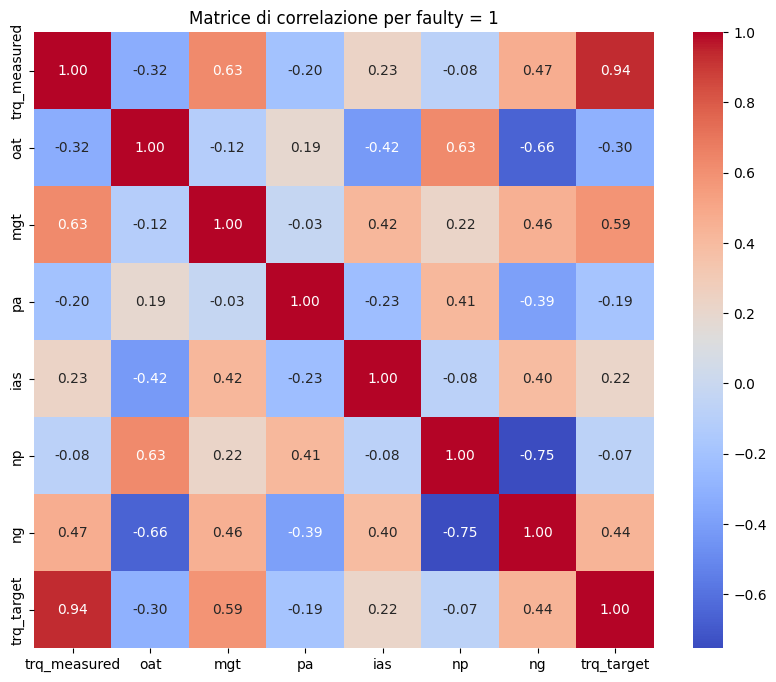

In [3]:
# Uniamo X e y per avere il 'faulty' nel dataset X
df = X_train_target.copy()
df['faulty'] = y_train_res['faulty']

# Separiamo il dataset in due sottoinsiemi
df_faulty_0 = df[df['faulty'] == 0].drop(columns='faulty')
df_faulty_1 = df[df['faulty'] == 1].drop(columns='faulty')

# Calcoliamo la matrice di correlazione per i due sottoinsiemi
correlation_matrix_0 = df_faulty_0.corr()
correlation_matrix_1 = df_faulty_1.corr()

# Visualizzazione delle heatmap per ciascun sottoinsieme
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_0, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matrice di correlazione per faulty = 0")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_1, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matrice di correlazione per faulty = 1")
plt.show()